## TechParva - Datathon
## Team SegFault

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [39]:
plt.style.use('fivethirtyeight')

In [12]:
!wget https://raw.githubusercontent.com/bimarshak7/my_nepal/master/my_nepal.csv -q -O dataset/my_nepal.csv 

In [19]:
total_voters = pd.read_csv("dataset/total_voters.csv")
total_voters

,District,Male,Female,Third Gender,Total
0,Achham,60441,67299,2,127742
1,Arghakhanchi,60296,66403,0,126699
2,Baglung,73963,82839,0,156802
3,Baitadi,60227,64596,1,124824
4,Bajhang,47888,49721,1,97610
...,...,...,...,...,...
75,Tanahu,90144,3104327,0,194471
76,Taplejung,37187,33591,0,70778
77,Terhathum,30334,30370,0,60704
78,Udayapur,88510,86951,0,175461


Oops! There are only 77 district in Nepal, but data shows.

!!! Duplicate data alert

In [21]:
total_voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   District      80 non-null     object
 1   Male          80 non-null     int64 
 2   Female        80 non-null     int64 
 3   Third Gender  80 non-null     int64 
 4   Total         80 non-null     object
dtypes: int64(3), object(2)
memory usage: 3.2+ KB


In [22]:
# Total should be integer but object xa hya, so some missing values

In [ ]:
df[]

In [23]:
total_voters.isna().sum()

District        0
Male            0
Female          0
Third Gender    0
Total           0
dtype: int64

In [24]:
dupli_voters = total_voters[total_voters.duplicated(['District'])]
dupli_voters

,District,Male,Female,Third Gender,Total
28,Jajarkot,42410,36536,1,????
29,Jajarkot,42410,36536,1,????
50,Nawalparasi (East),80316,89570,4,2212111
75,Tanahu,90144,3104327,0,194471


In [30]:
total_voters = total_voters.drop_duplicates(keep="first")
total_voters.shape

(77, 5)

In [33]:
# total ma chai misijng values xa, male+female ko toal...

In [34]:
total_voters['Total'] = total_voters['Male'] + total_voters['Female'] 

In [32]:
total_voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 79
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   District      77 non-null     object
 1   Male          77 non-null     int64 
 2   Female        77 non-null     int64 
 3   Third Gender  77 non-null     int64 
 4   Total         77 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.6+ KB


In [35]:
province = pd.read_csv("dataset/my_nepal.csv")
province.drop(['District code', 'X', 'Y'], axis=1, inplace=True)
province

,Province,District
0,PROVINCE 1,Taplejung
1,PROVINCE 1,Sankhuwasabha
2,PROVINCE 1,Solukhumbu
3,PROVINCE 1,Okhaldhunga
4,PROVINCE 1,Khotang
...,...,...
72,SUDURPASHCHIM,Dadeldhura
73,SUDURPASHCHIM,Doti
74,SUDURPASHCHIM,Achham
75,SUDURPASHCHIM,Kailali


In [37]:
merged = pd.merge(total_voters, province, on ='District')
merged

,District,Male,Female,Third Gender,Total,Province
0,Achham,60441,67299,2,127740,SUDURPASHCHIM
1,Arghakhanchi,60296,66403,0,126699,PROVINCE 5
2,Baglung,73963,82839,0,156802,GANDAKI
3,Baitadi,60227,64596,1,124823,SUDURPASHCHIM
4,Bajhang,47888,49721,1,97609,SUDURPASHCHIM
...,...,...,...,...,...,...
67,Surkhet,89268,95131,0,184399,KARNALI
68,Syangja,89544,101708,1,191252,GANDAKI
69,Taplejung,37187,33591,0,70778,PROVINCE 1
70,Terhathum,30334,30370,0,60704,PROVINCE 1


In [53]:
province_rec = merged.groupby(['Province']).aggregate({'Male':np.sum,'Female':np.sum,'Third Gender':np.sum,'Total':np.sum})
province_rec

,Male,Female,Third Gender,Total
Province,,,,
GANDAKI,488081,539626,8,1027707
KARNALI,355696,614275,1,969971
PROVINCE 1,1346942,1327615,7,2674557
PROVINCE 2,1429935,1234798,59,2664733
PROVINCE 3,1366103,1394051,28,2760154
PROVINCE 5,1041325,1119636,17,2160961
SUDURPASHCHIM,634379,669321,14,1303700


In [60]:
male_tot = province_rec['Male'].sum()
female_tot = province_rec['Female'].sum()
third_tot = province_rec['Third Gender'].sum()

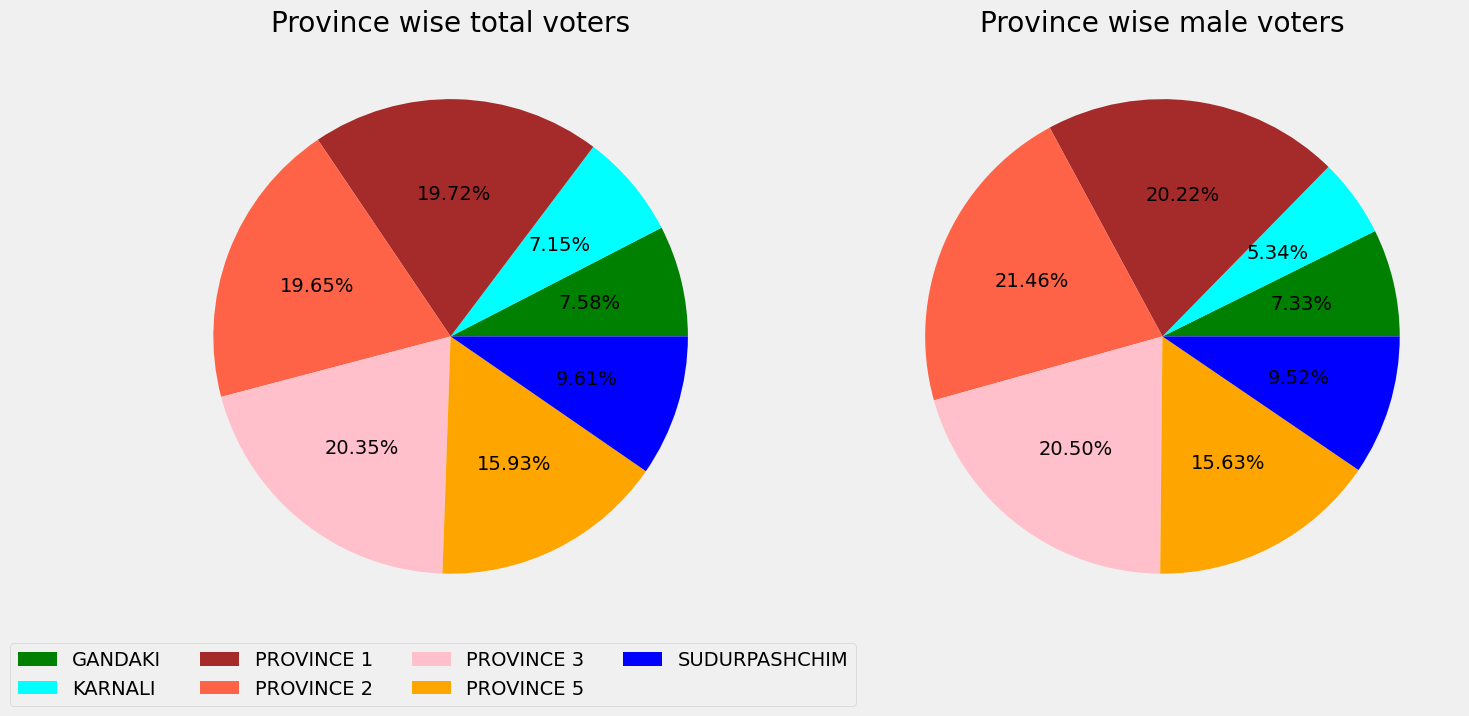

In [65]:
c = ( "green", "cyan", "brown","tomato", "pink", "orange",'blue') 

theme = plt.get_cmap('hsv')
plt.figure(figsize=(15,12))


plt.subplot(1,2,1)
plt.pie(province_rec['Total'],labels=None,autopct='%.2f%%',colors=c)
plt.title('Province wise total voters')

plt.subplot(1,2,2)
plt.pie(province_rec['Male'],labels=None,autopct='%.2f%%',colors=c)
plt.title('Province wise male voters')
plt.legend(labels=province_rec.index,ncol=4,bbox_to_anchor=(0, 0))


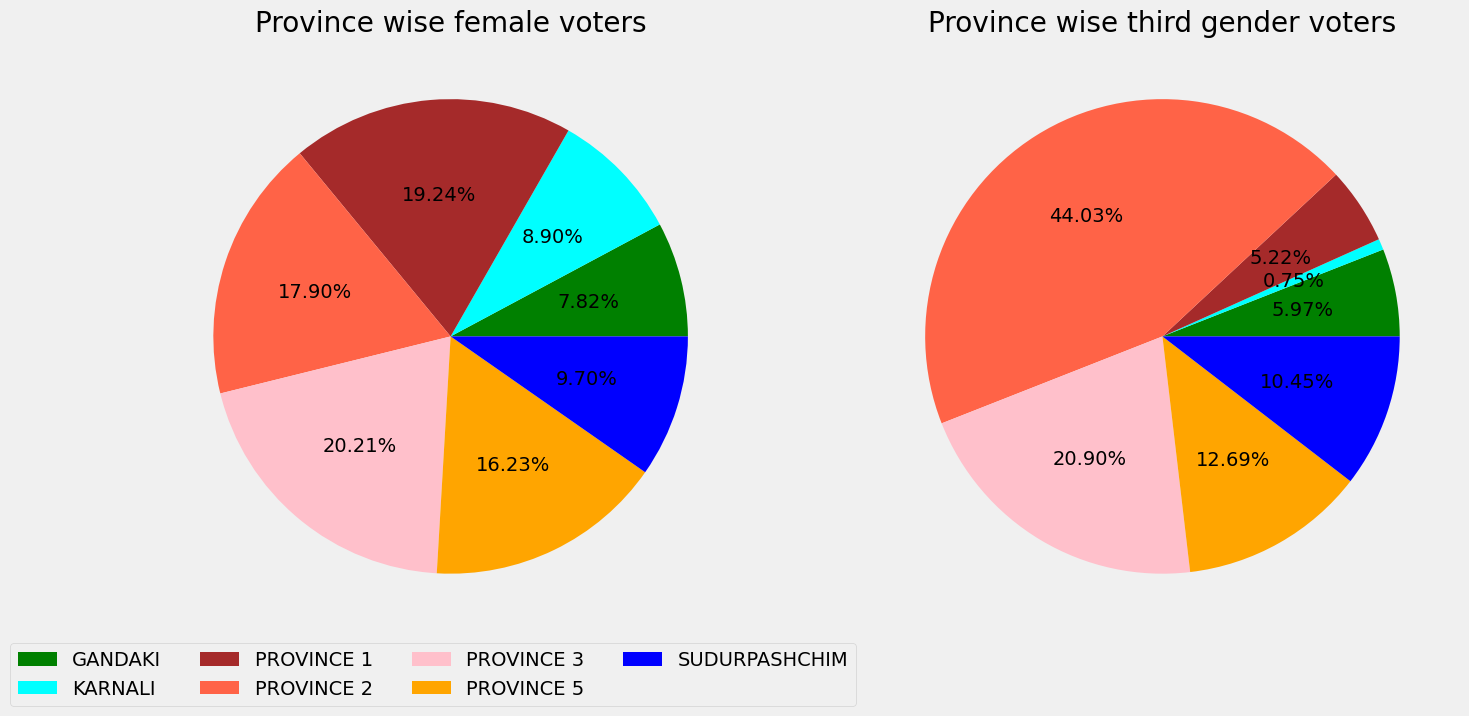

In [68]:
theme = plt.get_cmap('hsv')
plt.figure(figsize=(15,12))

plt.subplot(1,2,1)
plt.pie(province_rec['Female'],labels=None,autopct='%.2f%%',colors=c)
plt.title('Province wise female voters')

plt.subplot(1,2,2)
plt.pie(province_rec['Third Gender'],labels=None,autopct='%.2f%%',colors=c)
plt.title('Province wise third gender voters')
plt.legend(labels=province_rec.index,ncol=4,bbox_to_anchor=(0, 0))


## Constituencies overview

In [87]:
# import os
# print("Images of each category in train directory")
# for root, dirs, files in os.walk("dataset"):
#   print(f"There are {len(files)} images in '{root}'.")

# print("\nImages of each category in test directory")
# for root, dirs, files in os.walk("dataset"):
#   print(f"There are {len(files)} images in '{root}'.")

In [115]:
#get array of labels
import pathlib

root_path = "dataset/state/गण्डकी प्रदेश/"
root_dir = pathlib.Path(root_path)
districts = list(sorted([item.name for item in root_dir.glob("*")]))
districts

['कास्की',
 'गोरखा',
 'तनहुँ',
 'नवलपरासी (बर्दघाट सुस्ता पूर्व)',
 'पर्वत',
 'बागलुङ',
 'मनाङ्ग',
 'मुस्तांग',
 'म्याग्दी',
 'लमजुंग',
 'स्याङ्जा']

In [121]:
cons = {}
for dis in districts:
    data_dir = pathlib.Path(root_path+dis)
    cons[dis] = np.array(sorted([item.name for item in data_dir.glob("*") if item.name!=".DS_Store"]))
    
cons

{'कास्की': array(['१', '२', '३'], dtype='<U1'),
 'गोरखा': array(['१', '२'], dtype='<U1'),
 'तनहुँ': array(['१', '२'], dtype='<U1'),
 'नवलपरासी (बर्दघाट सुस्ता पूर्व)': array(['१', '२'], dtype='<U1'),
 'पर्वत': array(['१'], dtype='<U1'),
 'बागलुङ': array(['१', '२'], dtype='<U1'),
 'मनाङ्ग': array(['१'], dtype='<U1'),
 'मुस्तांग': array(['१'], dtype='<U1'),
 'म्याग्दी': array(['१'], dtype='<U1'),
 'लमजुंग': array(['१'], dtype='<U1'),
 'स्याङ्जा': array(['१', '२'], dtype='<U1')}

In [136]:
subs = {}
for dis in districts:
    subs[dis] = {}
    for sub in cons[dis]:
        data_dir = pathlib.Path(root_path+dis+"/"+sub)
        files = list(sorted([item.name for item in data_dir.glob("*.csv") if item.name!=".DS_Store"]))
        subs[dis][sub] = [str(data_dir)+"/"+file for file in files]
        

In [159]:
col_names = []
col_names = list(pd.read_csv("dataset/state/गण्डकी प्रदेश/कास्की/१/क.csv", nrows=0)) + ['SubCons']
print(col_names)

['SerialNo', 'StateID', 'CandidateName', 'Gender', 'Age', 'PoliticalPartyName', 'DistrictName', 'CenterConstID', 'SCConstID', 'TotalVotesReceived', 'EStatus', 'Rank']


In [155]:
a  = {'a':1}
list(a.keys())[0]

'a'

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,SCConstID,TotalVotesReceived,EStatus,Rank


In [302]:
state_main = pd.DataFrame(columns = col_names)

for con in subs:
    i = 0
    for sub in subs[con]:
        i+=1
        for x in subs[con][sub]:
            df = pd.read_csv(x)
            df['DistrictName'] = con
            df['CenterConstID'] = int(i)
            df['CenterConstID'] = df['CenterConstID'].astype(str).astype(int)
            df['SubCons'] = x[-5:-4]
            state_main = pd.concat([state_main, df], axis=0)
        

In [303]:
state_main.drop(['SerialNo', 'StateID'], axis=1, inplace=True)

In [304]:
state_main

,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,SCConstID,TotalVotesReceived,EStatus,Rank,SubCons
0,दिपक कोइराला,पुरुष,39,नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र),कास्की,1,1,18727,Elected,1,क
1,जीवन परियार,पुरुष,42,नेपाली काँग्रेस,कास्की,1,1,15081,NaN,2,क
2,देउ बहादुर गुरुङ्ग,पुरुष,43,राष्ट्रिय प्रजातन्त्र पार्टी,कास्की,1,1,697,NaN,3,क
3,नवराज खनाल,पुरुष,34,विवेकशील साझा पार्टी,कास्की,1,1,475,NaN,4,क
4,विर बहादुर गुरुङ्ग,पुरुष,57,संघीय समाजवादी फोरम नेपाल,कास्की,1,1,463,NaN,5,क
...,...,...,...,...,...,...,...,...,...,...,...
0,भगवत प्रकाश मल्ल,पुरुष,41,नेपाली काँग्रेस,स्याङ्जा,2,2,19170,Elected,1.0,ख
1,सुर्य प्रसाद गैह्रे,पुरुष,31,नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र),स्याङ्जा,2,2,17630,NaN,NaN,ख
2,बम बहादुर लामिछाने,पुरुष,44,राष्ट्रिय जनमुक्ति पार्टी,स्याङ्जा,2,2,609,NaN,3.0,ख
3,रुद्र बहादुर खत्री क्षेत्री,पुरुष,52,राष्ट्रिय प्रजातन्त्र पार्टी,स्याङ्जा,2,2,96,NaN,4.0,ख


In [305]:
state_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 4
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CandidateName       252 non-null    object
 1   Gender              251 non-null    object
 2   Age                 248 non-null    object
 3   PoliticalPartyName  251 non-null    object
 4   DistrictName        252 non-null    object
 5   CenterConstID       252 non-null    object
 6   SCConstID           251 non-null    object
 7   TotalVotesReceived  250 non-null    object
 8   EStatus             38 non-null     object
 9   Rank                244 non-null    object
 10  SubCons             252 non-null    object
dtypes: object(11)
memory usage: 23.6+ KB


In [306]:
parties = state_main['PoliticalPartyName'].unique()
parties

array(['नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)', 'नेपाली काँग्रेस',
       'राष्ट्रिय प्रजातन्त्र पार्टी', 'विवेकशील साझा पार्टी',
       'संघीय समाजवादी फोरम नेपाल',
       'राष्ट्रिय प्रजातन्त्र पार्टी (प्रजातान्त्रिक)',
       'नयाँ शक्ति पार्टी नेपाल', 'राष्ट्रिय जनमोर्चा',
       'देशभक्त जनगणतान्त्रिक मोर्चा नेपाल', 'मंगोल नेशनल अर्गनाइजेसन',
       'राष्ट्रिय जनमुक्ति पार्टी', 'नेपाल दलित पार्टी',
       'नेपाल कम्युनिष्ट पार्टी (एमाले)', '?',
       'आमूल परिवर्तन मसिहा पार्टी नेपाल', ' WRC', 'स्वतन्त्र',
       'जनसमाजवादी पार्टी नेपाल',
       'एकीकृत राष्ट्रिय प्रजातन्त्र पार्टी(राष्ट्रवादी)',
       'नेपाल कम्युनिष्ट पार्टी (माले) ', ' WRC Sangathan',
       'राष्ट्रिय शिवसेना पार्टी ', 'नयाँ शक्ति पार्टी', nan, 'wrc दल '],
      dtype=object)

In [307]:
dirty = [" WRC", "?", "wrc दल "]

Unknown and outliers parties name does't have good result, so they can be dropped

In [308]:
for d in dirty:
    i = (state_main.loc[state_main['PoliticalPartyName']==d]).index
    state_main.drop(index=i,inplace=True)

state_main['PoliticalPartyName'].dropna(inplace=True)
state_main['EStatus'] = state_main['EStatus'].fillna(False)

In [310]:
d
state_main.dropna(subset = ['PoliticalPartyName'],inplace=True)

In [311]:
parties = state_main['PoliticalPartyName'].unique()
parties

array(['नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)', 'नेपाली काँग्रेस',
       'राष्ट्रिय प्रजातन्त्र पार्टी', 'विवेकशील साझा पार्टी',
       'संघीय समाजवादी फोरम नेपाल', 'राष्ट्रिय जनमोर्चा',
       'देशभक्त जनगणतान्त्रिक मोर्चा नेपाल', 'मंगोल नेशनल अर्गनाइजेसन',
       'राष्ट्रिय जनमुक्ति पार्टी', 'नेपाल दलित पार्टी',
       'नेपाल कम्युनिष्ट पार्टी (एमाले)', 'नयाँ शक्ति पार्टी नेपाल',
       'स्वतन्त्र', 'राष्ट्रिय प्रजातन्त्र पार्टी (प्रजातान्त्रिक)',
       'जनसमाजवादी पार्टी नेपाल', 'आमूल परिवर्तन मसिहा पार्टी नेपाल',
       'एकीकृत राष्ट्रिय प्रजातन्त्र पार्टी(राष्ट्रवादी)',
       'नेपाल कम्युनिष्ट पार्टी (माले) ', 'राष्ट्रिय शिवसेना पार्टी ',
       nan], dtype=object)

In [294]:
state_main.isna().sum()

CandidateName         0
Gender                1
Age                   4
PoliticalPartyName    1
DistrictName          0
CenterConstID         0
SCConstID             0
TotalVotesReceived    0
EStatus               0
Rank                  4
SubCons               0
dtype: int64